# Bond scans



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyscf import gto, scf, mp
import py3Dmol

In [2]:
HARTREE2KCALMOL = 627.5094737775374055927342256

In [3]:
def get_atom_string(
    r_ch=1.0823, r_co=1.4144, r_oh=0.9578, a_och=106.79, a_coh=107.59, d_hcoh=180.00
):
    atom_string = f"""
    H
    H  1  1.7577
    H  1  1.7577  2  60.43
    C  1  {r_ch}  2  36.02    3  323.22
    O  4  {r_co}  1  {a_och}  2  238.84
    H  5  {r_oh}  4  {a_coh}  1  {d_hcoh}
    """
    return atom_string

In [4]:
mol = gto.Mole()
mol.atom = get_atom_string()
mol.unit = "Angstrom"
mol.basis = "cc-pvtz"
mol.verbose = 1

mol.build()

## O-H bond

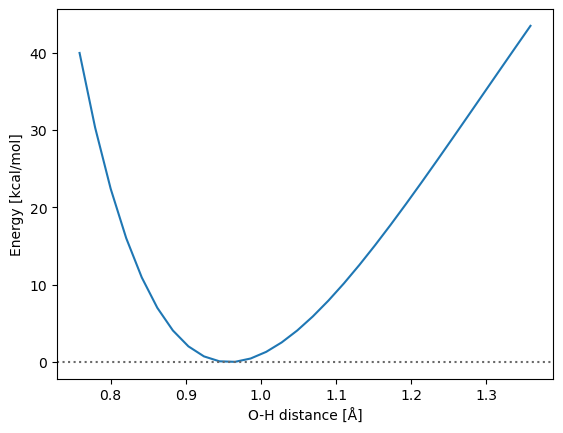

In [5]:
r_oh_eq = 0.9587
r_oh_scan = np.linspace(r_oh_eq - 0.2, r_oh_eq + 0.4, num=30)
r_oh_energies = np.empty(r_oh_scan.shape)

for i, r_oh in enumerate(r_oh_scan):
    mol.atom = get_atom_string(r_oh=r_oh)
    mol.build()
    mf = scf.RHF(mol)
    mf.conv_tol = 1e-12
    mf.run()
    mp2 = mp.MP2(mf)
    mp2.conv_tol = 1e-12
    mp2.run()
    r_oh_energies[i] = mp2.e_tot_scs

# Convert to kcal/mol and normalize from farthest
r_oh_energies *= HARTREE2KCALMOL
r_oh_energies -= np.min(r_oh_energies)

plt.plot(r_oh_scan, r_oh_energies)
plt.xlabel("O-H distance [Å]")
plt.ylabel("Energy [kcal/mol]")
plt.axhline(y=0, color="dimgrey", linestyle=":")

df = pd.DataFrame({"r": r_oh_scan, "e": r_oh_energies})
df.to_csv("meoh-oh-scan.csv", index=False)

## C-O


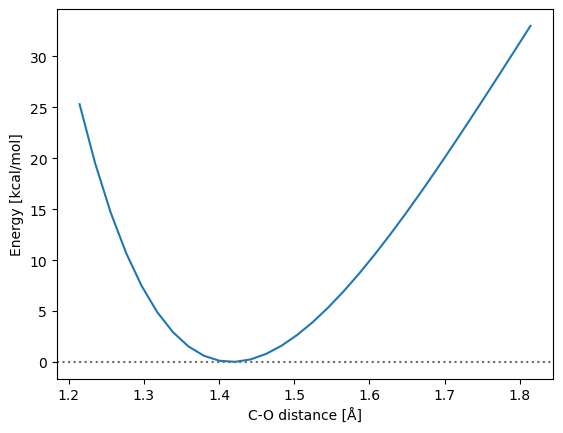

In [6]:
r_co_eq = 1.4144
r_co_scan = np.linspace(r_co_eq - 0.2, r_co_eq + 0.4, num=30)
r_co_energies = np.empty(r_co_scan.shape)

for i, r_co in enumerate(r_co_scan):
    mol.atom = get_atom_string(r_co=r_co)
    mol.build()
    mf = scf.RHF(mol)
    mf.conv_tol = 1e-12
    mf.run()
    mp2 = mp.MP2(mf)
    mp2.conv_tol = 1e-12
    mp2.run()
    r_co_energies[i] = mp2.e_tot_scs

# Convert to kcal/mol and normalize from farthest
r_co_energies *= HARTREE2KCALMOL
r_co_energies -= np.min(r_co_energies)

plt.plot(r_co_scan, r_co_energies)
plt.xlabel("C-O distance [Å]")
plt.ylabel("Energy [kcal/mol]")
plt.axhline(y=0, color="dimgrey", linestyle=":")

df = pd.DataFrame({"r": r_co_scan, "e": r_co_energies})
df.to_csv("meoh-co-scan.csv", index=False)

## C-H

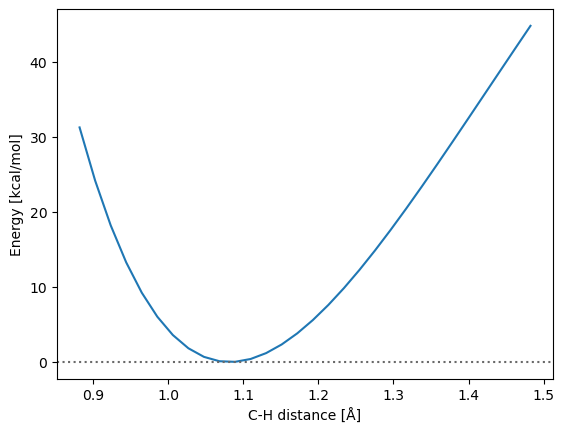

In [7]:
r_ch_eq = 1.0823
r_ch_scan = np.linspace(r_ch_eq - 0.2, r_ch_eq + 0.4, num=30)
r_ch_energies = np.empty(r_ch_scan.shape)

for i, r_ch in enumerate(r_ch_scan):
    mol.atom = get_atom_string(r_ch=r_ch)
    mol.build()
    mf = scf.RHF(mol)
    mf.conv_tol = 1e-12
    mf.run()
    mp2 = mp.MP2(mf)
    mp2.conv_tol = 1e-12
    mp2.run()
    r_ch_energies[i] = mp2.e_tot_scs

# Convert to kcal/mol and normalize from farthest
r_ch_energies *= HARTREE2KCALMOL
r_ch_energies -= np.min(r_ch_energies)

plt.plot(r_ch_scan, r_ch_energies)
plt.xlabel("C-H distance [Å]")
plt.ylabel("Energy [kcal/mol]")
plt.axhline(y=0, color="dimgrey", linestyle=":")

df = pd.DataFrame({"r": r_ch_scan, "e": r_ch_energies})
df.to_csv("meoh-ch-scan.csv", index=False)